# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import randn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [63]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df               

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df.shape

(907, 27)

In [65]:
df.size

24489

In [66]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [67]:
df.isnull().sum()


country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [68]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [69]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [70]:
df.primary_fuel.unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [71]:
df.other_fuel1.unique()               

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [72]:
df.other_fuel2.unique()            

array([nan, 'Oil'], dtype=object)

In [73]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [74]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [75]:
df=df.drop(['wepp_id',"generation_gwh_2019",'estimated_generation_gwh','other_fuel3','other_fuel2'],axis=1)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,http://www.cea.nic.in/,WRI,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,http://www.cea.nic.in/,WRI,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,...,http://www.cea.nic.in/,WRI,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [77]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       907
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [78]:
df=df.drop('generation_gwh_2013',axis=1)


In [79]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [81]:
df.dropna(how='all')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


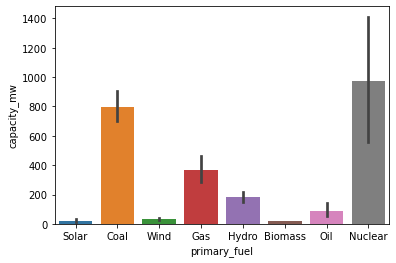

In [83]:
ax = sns.barplot(x="primary_fuel", y="capacity_mw", data=df)

In [84]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

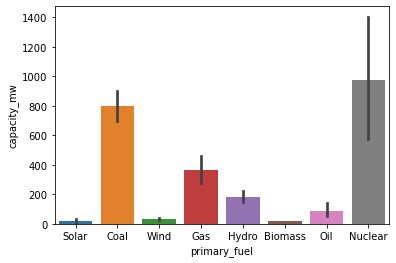

In [85]:
ax = sns.barplot(x="primary_fuel", y="capacity_mw", data=df)

In [86]:
df['latitude']=df['latitude'].fillna(df['latitude']).mean()
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,21.197918,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,21.197918,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.197918,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,21.197918,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.197918,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,21.197918,77.3568,Coal,Oil,2016.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,21.197918,78.1654,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,21.197918,75.5811,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,21.197918,73.7477,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [88]:
df['longitude']=df['longitude'].fillna(df['longitude']).mean()
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,21.197918,77.464907,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,21.197918,77.464907,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.197918,77.464907,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,21.197918,77.464907,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.197918,77.464907,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,21.197918,77.464907,Coal,Oil,2016.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,21.197918,77.464907,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,21.197918,77.464907,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,21.197918,77.464907,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [90]:
df.country_long.unique()

array(['India'], dtype=object)

In [91]:
df=df.drop('country_long',axis=1)
df

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,ACME Solar Tower,WRI1020239,2.5,21.197918,77.464907,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,21.197918,77.464907,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.197918,77.464907,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,AGARTALA GT,IND0000001,135.0,21.197918,77.464907,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,AKALTARA TPP,IND0000002,1800.0,21.197918,77.464907,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,YERMARUS TPP,IND0000513,1600.0,21.197918,77.464907,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,Yelesandra Solar Power Plant,WRI1026222,3.0,21.197918,77.464907,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,Yelisirur wind power project,WRI1026776,25.5,21.197918,77.464907,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,ZAWAR MINES,WRI1019901,80.0,21.197918,77.464907,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
dummy = pd.get_dummies(df[['country', 'name', 'gppd_idnr','owner','source','url','geolocation_source','generation_data_source']], drop_first=True)
df = pd.concat([df, dummy], axis=1)

In [93]:
df= df.drop(['country', 'name', 'gppd_idnr','owner','source','url','geolocation_source','generation_data_source'], 1)
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,...,url_https://www.google.com/maps/d/embed?mid=1bXiXRcLRnBCUfpkHM2J5EVryhG4&ll=31.06035315253383%2C35.02284616406246&z=8,url_https://www.iaea.org/PRIS/CountryStatistics/ReactorDetails.aspx?current=853,url_https://www.iocl.com,url_https://www.jaibalajigroup.com/power.html,url_https://www.kesocorp.com/,url_https://www.solairedirect.com,url_https://www.vardhman.com/,url_https://www.zaubacorp.com/company/MAHATMA-SUGAR-POWER-LIMITED/U15421MH1997PLC111855,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,21.197918,77.464907,Solar,NaN,2011.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,98.0,21.197918,77.464907,Coal,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2,39.2,21.197918,77.464907,Wind,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
3,135.0,21.197918,77.464907,Gas,NaN,2004.0,2019.0,617.789264,843.747000,886.004428,...,0,0,0,0,0,0,0,0,0,1
4,1800.0,21.197918,77.464907,Coal,Oil,2015.0,2019.0,3035.550000,5916.370000,6243.000000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,21.197918,77.464907,Coal,Oil,2016.0,2019.0,NaN,0.994875,233.596650,...,0,0,0,0,0,0,0,0,0,1
903,3.0,21.197918,77.464907,Solar,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
904,25.5,21.197918,77.464907,Wind,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
905,80.0,21.197918,77.464907,Coal,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


In [94]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [95]:
df1=lb.fit_transform(df['other_fuel1'])
pd.Series(df1)

0      3
1      3
2      3
3      3
4      2
      ..
902    2
903    3
904    3
905    3
906    3
Length: 907, dtype: int32

In [96]:
df['other_fuel1']=df1
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,...,url_https://www.google.com/maps/d/embed?mid=1bXiXRcLRnBCUfpkHM2J5EVryhG4&ll=31.06035315253383%2C35.02284616406246&z=8,url_https://www.iaea.org/PRIS/CountryStatistics/ReactorDetails.aspx?current=853,url_https://www.iocl.com,url_https://www.jaibalajigroup.com/power.html,url_https://www.kesocorp.com/,url_https://www.solairedirect.com,url_https://www.vardhman.com/,url_https://www.zaubacorp.com/company/MAHATMA-SUGAR-POWER-LIMITED/U15421MH1997PLC111855,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,21.197918,77.464907,Solar,3,2011.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,98.0,21.197918,77.464907,Coal,3,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2,39.2,21.197918,77.464907,Wind,3,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
3,135.0,21.197918,77.464907,Gas,3,2004.0,2019.0,617.789264,843.747000,886.004428,...,0,0,0,0,0,0,0,0,0,1
4,1800.0,21.197918,77.464907,Coal,2,2015.0,2019.0,3035.550000,5916.370000,6243.000000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,21.197918,77.464907,Coal,2,2016.0,2019.0,NaN,0.994875,233.596650,...,0,0,0,0,0,0,0,0,0,1
903,3.0,21.197918,77.464907,Solar,3,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
904,25.5,21.197918,77.464907,Wind,3,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
905,80.0,21.197918,77.464907,Coal,3,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


In [97]:
df.primary_fuel.unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [98]:
df.isnull().sum()

capacity_mw                                                                                0
latitude                                                                                   0
longitude                                                                                  0
primary_fuel                                                                               0
other_fuel1                                                                                0
                                                                                          ..
url_https://www.solairedirect.com                                                          0
url_https://www.vardhman.com/                                                              0
url_https://www.zaubacorp.com/company/MAHATMA-SUGAR-POWER-LIMITED/U15421MH1997PLC111855    0
geolocation_source_National Renewable Energy Laboratory                                    0
geolocation_source_WRI                                                

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Columns: 2598 entries, capacity_mw to geolocation_source_WRI
dtypes: float64(10), int32(1), object(1), uint8(2586)
memory usage: 2.3+ MB


In [100]:
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014']).mean()

In [101]:
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015']).mean()

In [102]:
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016']).mean()

In [103]:
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017']).mean()

In [104]:
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018']).mean()

In [105]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,...,url_https://www.google.com/maps/d/embed?mid=1bXiXRcLRnBCUfpkHM2J5EVryhG4&ll=31.06035315253383%2C35.02284616406246&z=8,url_https://www.iaea.org/PRIS/CountryStatistics/ReactorDetails.aspx?current=853,url_https://www.iocl.com,url_https://www.jaibalajigroup.com/power.html,url_https://www.kesocorp.com/,url_https://www.solairedirect.com,url_https://www.vardhman.com/,url_https://www.zaubacorp.com/company/MAHATMA-SUGAR-POWER-LIMITED/U15421MH1997PLC111855,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,21.197918,77.464907,Solar,3,2011.0,NaN,2431.82359,2428.226946,2467.936859,...,0,0,0,0,0,0,0,0,1,0
1,98.0,21.197918,77.464907,Coal,3,NaN,NaN,2431.82359,2428.226946,2467.936859,...,0,0,0,0,0,0,0,0,0,1
2,39.2,21.197918,77.464907,Wind,3,NaN,NaN,2431.82359,2428.226946,2467.936859,...,0,0,0,0,0,0,0,0,0,1
3,135.0,21.197918,77.464907,Gas,3,2004.0,2019.0,2431.82359,2428.226946,2467.936859,...,0,0,0,0,0,0,0,0,0,1
4,1800.0,21.197918,77.464907,Coal,2,2015.0,2019.0,2431.82359,2428.226946,2467.936859,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,21.197918,77.464907,Coal,2,2016.0,2019.0,2431.82359,2428.226946,2467.936859,...,0,0,0,0,0,0,0,0,0,1
903,3.0,21.197918,77.464907,Solar,3,NaN,NaN,2431.82359,2428.226946,2467.936859,...,0,0,0,0,0,0,0,0,0,0
904,25.5,21.197918,77.464907,Wind,3,NaN,NaN,2431.82359,2428.226946,2467.936859,...,0,0,0,0,0,0,0,0,0,1
905,80.0,21.197918,77.464907,Coal,3,NaN,NaN,2431.82359,2428.226946,2467.936859,...,0,0,0,0,0,0,0,0,0,1


In [106]:
df.isnull().sum()

capacity_mw                                                                                0
latitude                                                                                   0
longitude                                                                                  0
primary_fuel                                                                               0
other_fuel1                                                                                0
                                                                                          ..
url_https://www.solairedirect.com                                                          0
url_https://www.vardhman.com/                                                              0
url_https://www.zaubacorp.com/company/MAHATMA-SUGAR-POWER-LIMITED/U15421MH1997PLC111855    0
geolocation_source_National Renewable Energy Laboratory                                    0
geolocation_source_WRI                                                

In [107]:
df= df.drop(['commissioning_year', 'year_of_capacity_data'], 1)
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,...,url_https://www.google.com/maps/d/embed?mid=1bXiXRcLRnBCUfpkHM2J5EVryhG4&ll=31.06035315253383%2C35.02284616406246&z=8,url_https://www.iaea.org/PRIS/CountryStatistics/ReactorDetails.aspx?current=853,url_https://www.iocl.com,url_https://www.jaibalajigroup.com/power.html,url_https://www.kesocorp.com/,url_https://www.solairedirect.com,url_https://www.vardhman.com/,url_https://www.zaubacorp.com/company/MAHATMA-SUGAR-POWER-LIMITED/U15421MH1997PLC111855,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,21.197918,77.464907,Solar,3,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,...,0,0,0,0,0,0,0,0,1,0
1,98.0,21.197918,77.464907,Coal,3,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,...,0,0,0,0,0,0,0,0,0,1
2,39.2,21.197918,77.464907,Wind,3,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,...,0,0,0,0,0,0,0,0,0,1
3,135.0,21.197918,77.464907,Gas,3,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,...,0,0,0,0,0,0,0,0,0,1
4,1800.0,21.197918,77.464907,Coal,2,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,21.197918,77.464907,Coal,2,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,...,0,0,0,0,0,0,0,0,0,1
903,3.0,21.197918,77.464907,Solar,3,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,...,0,0,0,0,0,0,0,0,0,0
904,25.5,21.197918,77.464907,Wind,3,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,...,0,0,0,0,0,0,0,0,0,1
905,80.0,21.197918,77.464907,Coal,3,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,...,0,0,0,0,0,0,0,0,0,1


In [108]:
df2=lb.fit_transform(df['primary_fuel'])
pd.Series(df2)

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Length: 907, dtype: int32

In [110]:
df['primary_fuel']=df2
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,...,url_https://www.google.com/maps/d/embed?mid=1bXiXRcLRnBCUfpkHM2J5EVryhG4&ll=31.06035315253383%2C35.02284616406246&z=8,url_https://www.iaea.org/PRIS/CountryStatistics/ReactorDetails.aspx?current=853,url_https://www.iocl.com,url_https://www.jaibalajigroup.com/power.html,url_https://www.kesocorp.com/,url_https://www.solairedirect.com,url_https://www.vardhman.com/,url_https://www.zaubacorp.com/company/MAHATMA-SUGAR-POWER-LIMITED/U15421MH1997PLC111855,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,21.197918,77.464907,6,3,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,...,0,0,0,0,0,0,0,0,1,0
1,98.0,21.197918,77.464907,1,3,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,...,0,0,0,0,0,0,0,0,0,1
2,39.2,21.197918,77.464907,7,3,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,...,0,0,0,0,0,0,0,0,0,1
3,135.0,21.197918,77.464907,2,3,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,...,0,0,0,0,0,0,0,0,0,1
4,1800.0,21.197918,77.464907,1,2,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,21.197918,77.464907,1,2,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,...,0,0,0,0,0,0,0,0,0,1
903,3.0,21.197918,77.464907,6,3,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,...,0,0,0,0,0,0,0,0,0,0
904,25.5,21.197918,77.464907,7,3,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,...,0,0,0,0,0,0,0,0,0,1
905,80.0,21.197918,77.464907,1,3,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,...,0,0,0,0,0,0,0,0,0,1


In [111]:
df.primary_fuel.unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

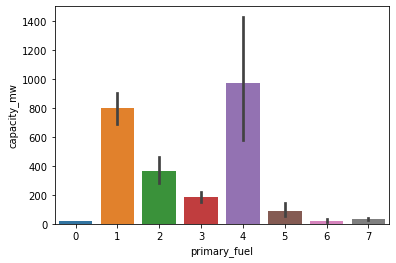

In [116]:
ax = sns.barplot(x="primary_fuel", y="capacity_mw", data=df)

In [117]:
X=df.drop(columns=['primary_fuel'])
y=df['primary_fuel']

In [121]:
X.shape
y.shape

(907,)

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=348)
y_train.head()

767    1
686    0
303    7
81     3
413    7
Name: primary_fuel, dtype: int32

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
regression=LinearRegression()

In [125]:
regression.fit(X,y)

LinearRegression()

In [126]:
regression.score(X_train,y_train)
regression.score(X_test,y_test)

1.0

In [127]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [128]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [129]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor()]
max_r2_score=0
for r_state in range(50,90):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=r_state)
    for i in model:
        i.fit(X_train,y_train)
        pred=i.predict(X_test)
        r2_sc=r2_score(y_test,pred)
        print('R2 score',r_state,'is',r2_sc)
        if r2_sc>max_r2_score:
            max_r2_score=r2_sc
            final_state=r_state
            final_model=i
print()
print()
print()
print()
print('Max r2 score',final_state,'is',max_r2_score,"model is",final_model)

R2 score 50 is 0.9505463457807128
R2 score 50 is 0.5615006297443579
R2 score 50 is 0.8774565791375358
R2 score 51 is 0.9208097765885518
R2 score 51 is 0.5312265331664581
R2 score 51 is 0.8736197007576558
R2 score 52 is 0.8749392891575872
R2 score 52 is 0.5069646028604775
R2 score 52 is 0.8426964890029551
R2 score 53 is 0.9306927006538284
R2 score 53 is 0.43533145674158147
R2 score 53 is 0.7980662207508407
R2 score 54 is 0.9389784946236559
R2 score 54 is 0.5020343820523032
R2 score 54 is 0.8672370259037413
R2 score 55 is 0.9010073310441827
R2 score 55 is 0.5039664642051749
R2 score 55 is 0.83851123615657
R2 score 56 is 0.9181569079896164
R2 score 56 is 0.5381139634009552
R2 score 56 is 0.8452610130539081
R2 score 57 is 0.9021726756761153
R2 score 57 is 0.44146135206778214
R2 score 57 is 0.8580630054897037
R2 score 58 is 0.9204971747894712
R2 score 58 is 0.4841856700340893
R2 score 58 is 0.8158362934945622
R2 score 59 is 0.9372379153034422
R2 score 59 is 0.6210664419677829
R2 score 59 is

In [130]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [131]:
print('MEAN ABSOLUTE ERROR',mean_absolute_error(y_test,pred))
print('MEAN SQUARED ERROE',mean_squared_error(y_test,pred))
print('ROOT MEANS ABSOLUTE ERROR',np.sqrt(mean_absolute_error(y_test,pred)))

MEAN ABSOLUTE ERROR 0.68881117114419
MEAN SQUARED ERROE 0.855391020795762
ROOT MEANS ABSOLUTE ERROR 0.8299464869159878


Text(0, 0.5, 'predicted_y')

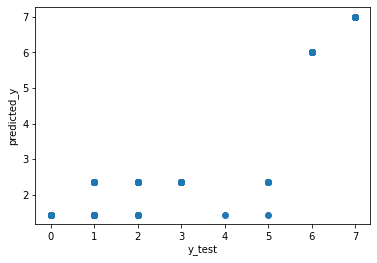

In [132]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('y_test')
plt.ylabel('predicted_y')

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
random_clf=RandomForestClassifier()
random_clf.fit(X_train,y_train)

RandomForestClassifier()

In [137]:
def metric_score(clf,Xc_train,Xc_test,yc_train,yc_test,train=True):
    if train:
        yc_pred=clf.predict(Xc_train)
        print('\n===============Train Result================')
        print(f'Accuracy Score:{accuracy_score(yc_train,yc_pred)*100:.2f}%')
   
    elif train==False:    
        pred=clf.predict(Xc_test)
        print('\n===============Test Result================')
        print(f'Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%')
        
        print('\n \n Test classification report \n',classification_report(yc_test,pred,digits=2))
        

In [139]:
metric_score(random_clf,X_train,X_test,y_train,y_test,train=True)
metric_score(random_clf,X_train,X_test,y_train,y_test,train=False)


===============Train Result================
Accuracy Score:100.00%

===============Test Result================
Accuracy Score:83.70%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.56      0.71      0.63        14
           1       0.86      0.88      0.87        67
           2       0.00      0.00      0.00        20
           3       0.76      1.00      0.87        61
           4       0.00      0.00      0.00         1
           5       1.00      0.20      0.33         5
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        29

    accuracy                           0.84       227
   macro avg       0.65      0.60      0.59       227
weighted avg       0.77      0.84      0.79       227



RandomForestClassifier()

In [142]:
y_pred = rfc.predict(X_test)
print('Random Forest Model Accuracy : ', rfc.score(X_test, y_test)*100, '%')

Random Forest Model Accuracy :  84.14096916299559 %


In [143]:
from sklearn.metrics import classification_report

In [144]:
from sklearn.metrics import classification_report

print("The classification report: \n\n {}".format(classification_report(y_test, y_pred)))

The classification report: 

               precision    recall  f1-score   support

           0       1.00      0.21      0.35        14
           1       0.80      1.00      0.89        67
           2       0.00      0.00      0.00        20
           3       0.76      1.00      0.87        61
           4       0.00      0.00      0.00         1
           5       1.00      0.20      0.33         5
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        29

    accuracy                           0.84       227
   macro avg       0.70      0.55      0.55       227
weighted avg       0.78      0.84      0.78       227

